## Synthetic ASL Alphabet
## 1. Gather data, determine the method of data collection and provenance of the data (1 point)

#### Synthetic image dataset of alphabet in American Sign Language

This dataset created by Lexset contains 27000 images of the alphabet signed in American Sign Language. Each image is 512 x 512. The data is separated into a training and testing set. Within each set, there are 27 folders, one for each letter and an extra folder of random backgrounds. Each training folder contains 900 examples while each testing folder contains 100 examples.

These images were created using Lexset's synthetic data generation platform Seahaven: https://seahaven.lexset.ai/

![alt text](alphabet-1.jpg)



### Instructions:

1.1. **Download the Dataset:**
   - Access the dataset at [Synthetic ASL Alphabet Dataset](https://www.kaggle.com/datasets/lexset/synthetic-asl-alphabet).
   - Click on the "Download" button to obtain the ZIP file containing the dataset.

1.2. **Extract the Files:**
   - After downloading the ZIP file, extract its contents using any file extraction tool (e.g., WinRAR, 7-Zip, or the built-in extraction option in your operating system).
   - Place the extracted files into a folder named `/Data/` on your PC. Ensure the `/Data/` folder is located in the same directory as your script or notebook.

1.3. **Organize the Folder Structure:**
   - Once the files are extracted, arrange the dataset to achieve the following structure:
     - `/Data/Test_Alphabet/`
     - `/Data/Train_Alphabet/`

1.4. **Verify the Structure:**
   - Double-check that the images are correctly placed within their respective folders (`Test_Alphabet` and `Train_Alphabet`).
   - The `/Data/` folder should now contain the subfolders `Test_Alphabet` and `Train_Alphabet`.

1.5. **Run the Code on Your PC:**
   - Ensure all file paths in your script or notebook point to the `/Data/` folder.


## 2.  Identify a Deep Learning Problem (5 points)

This notebook focuses on utilizing the Synthetic ASL Alphabet dataset to develop a model capable of recognizing images of different letters in the American Sign Language (ASL) Alphabet. By leveraging the power of Convolutional Neural Networks (CNNs), this project aims to address the challenge of classifying ASL alphabet images with high accuracy and efficiency.

The use of CNNs in this context is particularly appropriate due to their remarkable performance in the field of computer vision. Unlike traditional neural networks, CNNs are specifically designed to process multi-dimensional inputs like images. They achieve this by using convolutional layers to identify spatial hierarchies of features, from simple edges to complex textures. This feature extraction capability is critical for image classification tasks, as it allows the model to learn and detect patterns while preserving the spatial relationships between pixels. Flattening an image into a one-dimensional array, by contrast, would strip away these relationships, making it harder to recognize meaningful features.

In this project, the Synthetic ASL Alphabet dataset provides an ideal playground for exploring the strengths of CNNs. The dataset contains labeled images of ASL alphabet letters, divided into training and testing subsets. These subsets will be used to train the model and evaluate its performance. By applying preprocessing techniques like normalization and augmentation, the dataset will be prepared to ensure robustness and reduce overfitting.

The notebook will guide us through the process of designing, implementing, and training a CNN model. Key steps will include:
1. Building the architecture of the CNN with layers such as convolutional, pooling, and dense layers.
2. Optimizing the model using techniques like dropout and regularization to enhance generalization.
3. Evaluating the model's accuracy and loss on the test dataset to gauge its effectiveness in recognizing ASL letters.

By the end of this project, the trained CNN will serve as a powerful tool for interpreting images of the ASL alphabet. Beyond the technical achievements, this work highlights the potential of machine learning in promoting accessibility and communication for the Deaf and Hard-of-Hearing communities. Developing systems that understand sign language is a significant step towards creating a more inclusive and connected world.

This project not only demonstrates the practical applications of CNNs but also emphasizes the importance of technology in solving real-world problems. As we delve into the intricacies of model training and evaluation, we embrace the transformative potential of artificial intelligence in bridging gaps and fostering understanding across diverse communities.



## 3. Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (34 points)

3.1 The following code is designed to import all the necessary libraries for this project. This approach is advantageous because it allows you to identify any missing libraries in your environment at an early stage, enabling you to address the issue promptly before proceeding further.

If any of these libraries are not already installed in your environment, you can install them using `pip` or any other package manager that works best for you.

In [79]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import IPython.display as display
import os
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


3.2 The following code is intended to verify that all necessary data is present. This step is optional, so feel free to skip it if desired.

d:\REPO\LocalFInal\Data\Test_Alphabet\W\0aa05765-b5e4-4bfb-b1b7-86e4c5495093.rgb_0000.png


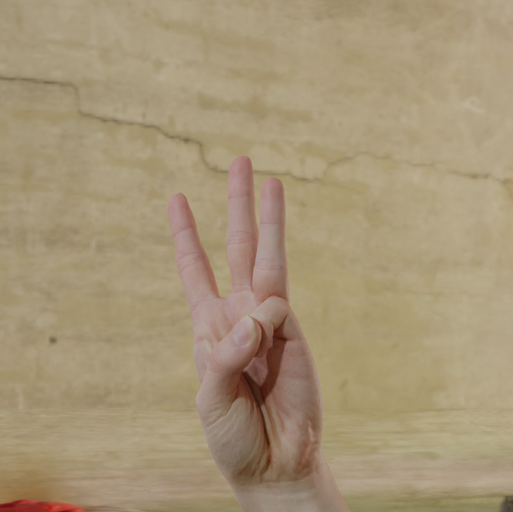

Size:(512, 513, 3)


In [ ]:
filepaths = {}
cwd = os.getcwd()
train_a_dir_w = 'Data\\Test_Alphabet\\W'
train_a_dir = cwd + '\\' + 'Data\\Test_Alphabet\\'


for dirname, _, filenames in os.walk('Data\\'):
    for filename in filenames:
        if dirname not in filepaths:
            filepaths[dirname] = { 'files': [], 'length': 0}

        filepaths[dirname]['files'].append(filename)
        filepaths[dirname]['length'] = len(filepaths[dirname]['files'])
path = cwd + '\\' + train_a_dir_w + '\\' + filepaths[train_a_dir_w]['files'][10]
print(path)
img = Image.open(path)
display.display(img)
img.show()

img_np = np.array(img)
print("Size:"+ str(img_np.shape))



Now, let's evaluate the quality of the data.

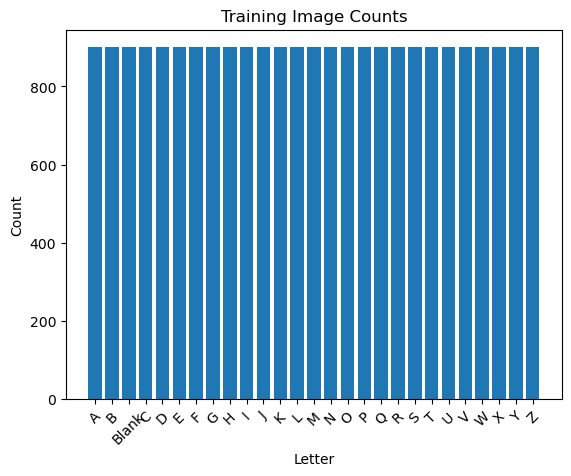

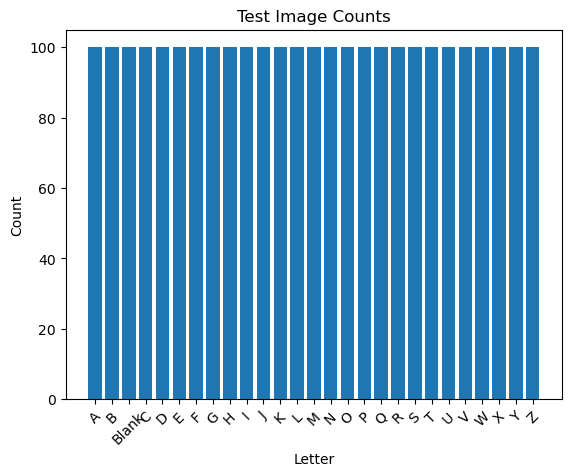

In [58]:
train_directories = [dirname for dirname in sorted(filepaths) if 'Train' in dirname]
test_directores = [dirname for dirname in sorted(filepaths) if 'Test' in dirname]

train_counts = [filepaths[dirname]['length'] for dirname in train_directories]
test_counts = [filepaths[dirname]['length'] for dirname in test_directores]
train_letters = [dirname.split('\\')[-1] for dirname in train_directories]
test_letters = [dirname.split('\\')[-1] for dirname in test_directores]

plt.bar(train_letters, train_counts)
plt.title('Training Image Counts')
plt.xlabel('Letter')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

plt.bar(test_letters, test_counts)
plt.title('Test Image Counts')
plt.xlabel('Letter')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

The data quality is excellent, and the shape of all the images is clear enough to easily identify the letters they represent.


Found 2700 files belonging to 27 classes.
Found 2700 files belonging to 27 classes.


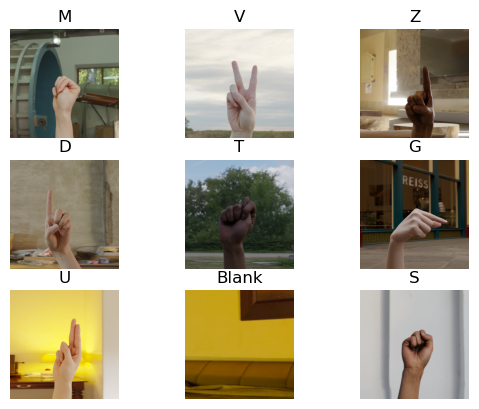

In [60]:
RANDOM_SEED = 67
test_generator = keras.utils.image_dataset_from_directory(
    train_a_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(512, 513),
    shuffle=True,
    seed=RANDOM_SEED,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

train_generator = keras.utils.image_dataset_from_directory(
    train_a_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(512, 513),
    shuffle=True,
    seed=RANDOM_SEED,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

class_names = np.array(train_generator.class_names)
for images, labels in train_generator.take(1):
    labels = tf.cast(labels, tf.int32)
    for i in range(9):
        label_idx = tf.where(labels[i])[0][0].numpy()
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[label_idx])
        plt.axis("off")

The Synthetic ASL Alphabet dataset offers an exciting opportunity to explore how machine learning can be applied to recognize American Sign Language (ASL) alphabet signs. The dataset consists of a total of 27,000 images, divided into training and testing subsets with a 90-10 split: 24,300 images are used for training, and 2,700 for testing. The images represent all letters of the ASL alphabet, along with a blank category that trains the model to recognize when no ASL sign is present. This ensures robust classification and prepares the model for real-world scenarios. Additionally, the images are evenly distributed across categories, and the resolution of 512x513 pixels provides sufficient clarity for accurate letter recognition.

Diversity is a standout feature of this dataset, with variations in hand orientation, angles, backgrounds, and skin tones. Such diversity enriches the dataset, challenging the model to learn from a range of conditions. This enhances its generalization ability, making it more effective in real-world applications where conditions often vary widely.

To prepare the dataset for model training, careful preprocessing is required. Importantly, transformations like flipping or rotation are deliberately excluded, as the orientation of the hand is crucial for correctly identifying ASL signs. Instead, preprocessing focuses on resizing images and rescaling pixel values. The pixel values, initially in the range of 0-255, are normalized to the range of 0-1 through an image rescaling layer. This step not only simplifies computations for the neural network but also accelerates the training process and improves model performance.

These preprocessing choices align closely with the strengths of Convolutional Neural Networks (CNNs), the model type chosen for this task. CNNs excel in computer vision tasks due to their ability to identify spatial features, preserve pixel proximity, and adapt to multidimensional data formats. By training the CNN on this well-structured dataset, the project leverages advanced machine learning methods to create a model capable of recognizing ASL signs with high accuracy.

In summary, the Synthetic ASL Alphabet dataset provides a rich foundation for building an image classification model. With thoughtful preprocessing and the application of CNNs, this project not only showcases the power of machine learning in solving visual recognition challenges but also contributes to the broader effort of advancing accessibility technologies. Such initiatives highlight the transformative potential of AI in bridging communication gaps and fostering inclusivity.


## 4. Perform Analysis Using Deep Learning Models of your Choice, Present Discussion, and Conclusions (65 points)



### Designing a Convolutional Neural Network for ASL Alphabet Recognition

The American Sign Language (ASL) alphabet is a vital tool for communication in Deaf and Hard-of-Hearing communities, and its recognition by machines can unlock new possibilities for accessibility and interaction. This project aims to develop a machine learning model capable of identifying ASL alphabet signs using images. Leveraging the power of Convolutional Neural Networks (CNNs), we craft an architecture that balances simplicity and performance to achieve this goal.

#### The Model Architecture

The designed CNN follows a systematic approach to process and classify ASL images. The first step involves rescaling the input images, ensuring uniformity and preparing them for subsequent layers. After preprocessing, the model comprises three sets of convolutional, max pooling, and batch normalization layers. These layers serve distinct yet interconnected purposes:
1. **Convolutional Layers:** Extract spatial features like edges, textures, and patterns from images.
2. **Max Pooling Layers:** Reduce the spatial dimensions of feature maps while retaining critical information.
3. **Batch Normalization Layers:** Stabilize and accelerate training by normalizing the outputs of previous layers.

Once the feature extraction is complete, the outputs are flattened into a one-dimensional array. This transformation enables integration with fully connected (dense) layers, where the actual classification process begins. Two dense layers are employed, with a dropout mechanism in between to minimize overfitting and enhance model generalization. The final dense layer consists of 27 outputs, corresponding to the 26 letters of the English alphabet and a blank category. To ensure accurate predictions, the **ReLU** activation function is used in all layers except the final output layer, which utilizes **softmax**. This facilitates the selection of the most probable category for a given image.

#### Training Strategy

The training process is crucial to refining the model's ability to classify ASL signs effectively. To achieve optimal results, the model is trained for 15 epochs, with **early stopping** implemented to prevent overfitting. The Adam optimization algorithm, widely recognized for its efficiency, is employed with a default learning rate of 0.001. These training parameters ensure a balanced approach that optimizes performance without compromising computational resources.



### Model 1


In [ ]:

epochs = 20
epochs_range = list(range(epochs))


model1 = keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(27, activation='softmax')]
)

earlyStopping = keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=4,
      restore_best_weights=True
  )

model1.compile(
  optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])


model1_history = model1.fit(train_generator, validation_data=test_generator, epochs=epochs, callbacks=[earlyStopping])
#20 minutes to train on 1 GPU
# Final result for model 1 85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 922ms/step - accuracy: 0.6166 - loss: 1.3258 - val_accuracy: 0.6526 - val_loss: 1.6062

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 924ms/step - accuracy: 0.0777 - loss: 20.8855 - val_accuracy: 0.0370 - val_loss: 57.4108
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 923ms/step - accuracy: 0.1313 - loss: 4.2983 - val_accuracy: 0.0370 - val_loss: 44.2906
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 922ms/step - accuracy: 0.1908 - loss: 3.3314 - val_accuracy: 0.0370 - val_loss: 47.2279
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 932ms/step - accuracy: 0.2519 - loss: 2.8769 - val_accuracy: 0.0393 - val_loss: 48.4219
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 935ms/step - accuracy: 0.2973 - loss: 2.6197 - val_accuracy: 0.0933 - val_loss: 19.4744
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 930ms/step - accuracy: 0.3498 - loss: 2.3360 - val_accuracy: 0.2374 - val_loss: 8.8628
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 928ms/step - accuracy: 0.3942 - loss: 2.1645 - val_accuracy: 0.4244 - val_loss: 3.3410
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 922ms/step - accuracy: 0.4220 - loss: 2.1105 - va

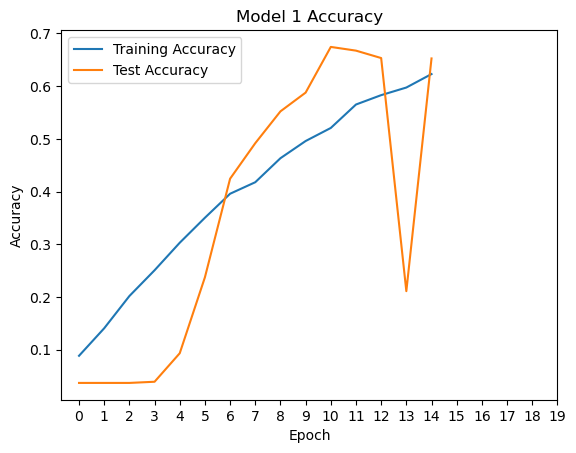

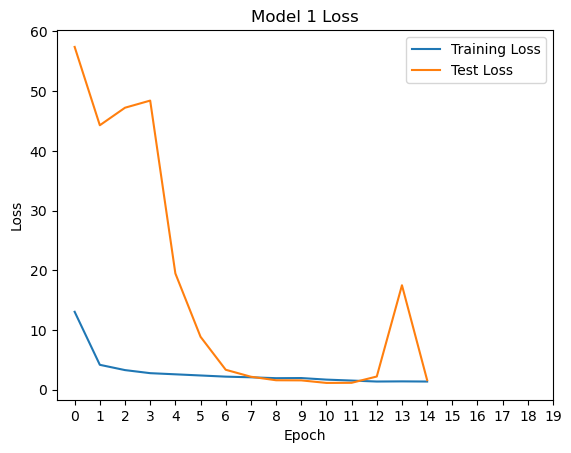

In [64]:
plt.plot(model1_history.history['accuracy'], label='Training Accuracy')
plt.plot(model1_history.history['val_accuracy'], label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 1 Accuracy')
plt.xticks(epochs_range)
plt.show()

plt.plot(model1_history.history['loss'], label='Training Loss')
plt.plot(model1_history.history['val_loss'], label="Test Loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 1 Loss')
plt.xticks(epochs_range)
plt.show()

### Reflecting on model 1 performance and lessons learned

The initial model demonstrated promising results, with steady improvement on the training data. However, during validation, a different trend emerged. While early epochs showed consistent progress, the validation loss began fluctuating between the **11th and 14th** epochs. This instability hinted at challenges in the model's ability to generalize well to unseen data. Towards the end of training, an increase in validation loss was observed, prompting the activation of early stopping. This mechanism effectively prevented overfitting, ensuring the model didn't become overly specialized to the training data at the expense of broader applicability.

Despite these observations, the first model laid a strong foundation for further improvements. The results provided valuable insights into the model's learning dynamics, highlighting areas that required fine-tuning.

Implementing Updates for Better Results
To address the challenges identified in the first iteration, key adjustments were made to the model's training process. First, the learning rate was reduced by a factor of five, from 0.001 to 0.0002. This adjustment ensures more precise updates to the model's weights, allowing it to converge more effectively without overshooting optimal values.
Additionally, the number of training epochs was increased from 15 to 25. While this provides the model with more opportunities to learn, it also introduces a greater risk of overfitting. To counterbalance this risk, a second Dropout layer was introduced before the first dense layer. By randomly deactivating neurons during training, this regularization technique reduces the model's reliance on specific features and enhances its ability to generalize to new data.

Looking Ahead
These updates exemplify a thoughtful and systematic approach to model improvement. By addressing specific challenges observed in the first model, the changes aim to strike a balance between learning capacity and generalization ability. The revised training strategy has the potential to deliver a more robust model, capable of accurately recognizing ASL alphabet signs across diverse conditions.
This process underscores the iterative nature of machine learning, where each cycle of evaluation and refinement brings the model closer to its full potential. Beyond its technical achievements, this project serves as a reminder of the transformative impact of technology in bridging communication gaps and fostering inclusivity.


### Model 2

In [ ]:
epochs2 = 30
epochs_range2 = list(range(epochs2))

model2 = keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(27, activation='softmax')]
)

earlyStopping = keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=4,
      restore_best_weights=True
  )

model2.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])


model2_history = model2.fit(train_generator, validation_data=test_generator, epochs=epochs2, callbacks=[earlyStopping])
# 30min
# Final result for model 2 85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 935ms/step - accuracy: 0.9676 - loss: 0.1172 - val_accuracy: 0.9993 - val_loss: 0.0108

Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 940ms/step - accuracy: 0.0997 - loss: 6.6506 - val_accuracy: 0.0370 - val_loss: 10.5932
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 935ms/step - accuracy: 0.4896 - loss: 1.8103 - val_accuracy: 0.0370 - val_loss: 15.3859
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 935ms/step - accuracy: 0.7165 - loss: 0.9417 - val_accuracy: 0.0370 - val_loss: 16.7406
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 936ms/step - accuracy: 0.8403 - loss: 0.4938 - val_accuracy: 0.0522 - val_loss: 13.1565
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 937ms/step - accuracy: 0.8864 - loss: 0.3776 - val_accuracy: 0.1607 - val_loss: 7.8642
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 938ms/step - accuracy: 0.9285 - loss: 0.2416 - val_accuracy: 0.8256 - val_loss: 0.6102
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 935ms/step - accuracy: 0.9426 - loss: 0.1835 - val_accuracy: 0.9152 - val_loss: 0.3057
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 936ms/step - accuracy: 0.9520 - loss: 0.1495 - val_

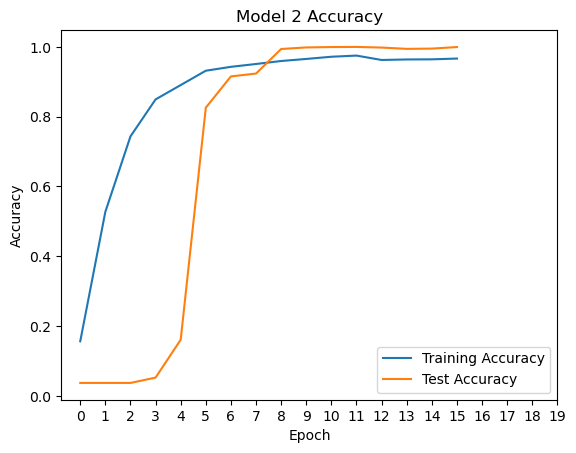

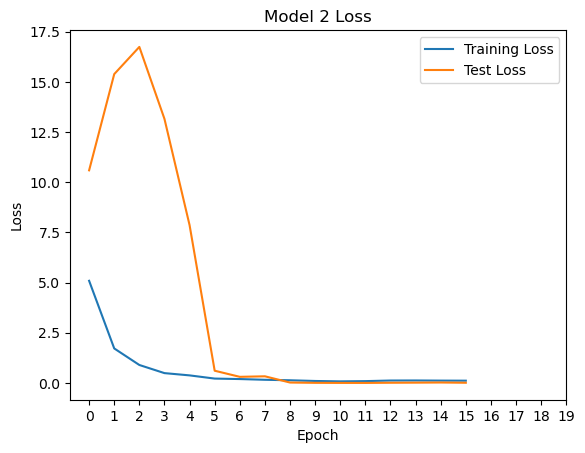

In [68]:
plt.plot(model2_history.history['accuracy'], label='Training Accuracy')
plt.plot(model2_history.history['val_accuracy'], label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 2 Accuracy')
plt.xticks(epochs_range2)
plt.show()

plt.plot(model2_history.history['loss'], label='Training Loss')
plt.plot(model2_history.history['val_loss'], label="Test Loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 2 Loss')
plt.xticks(epochs_range2)
plt.show()

### Reflecting on model 2 performance and lessons learned

In the pursuit of developing a robust Convolutional Neural Network (CNN) for ASL alphabet recognition, the second iteration of the model brought a mix of insights and challenges. By analyzing its performance, we can identify critical areas for improvement and refine our understanding of how adjustments to hyperparameters and training strategies influence model behavior.

#### Performance Analysis

Model 2 performed similarly to its predecessor in terms of accuracy but introduced an unexpected twist in its loss curve. The sharp decrease in loss, followed by a plateau, suggests that the learning rate might have been too high. This caused the model to overshoot the local minimum during early epochs, requiring additional time to converge. Interestingly, despite efforts to slow down training and minimize overfitting, the model exhibited overfitting tendencies earlier than the first model. Early stopping activated after fewer epochs, suggesting that the adjustments introduced in this iteration were not fully effective in addressing these challenges.

#### Adjustments and Their Impact

The updates to Model 2 aimed to enhance performance by reducing the learning rate and introducing additional dropout layers for regularization. While theoretically promising, these changes had mixed results in practice:
- The high initial learning rate may have negated the impact of reducing it later, leading to less precise weight updates.
- The additional dropout layer, while intended to combat overfitting, may have inadvertently disrupted the learning process by excessively removing features critical for early training phases.

These outcomes underscore the complexity of tuning machine learning models. While each adjustment is designed to address a specific issue, the interplay between hyperparameters and model architecture can produce unintended effects.

#### Lessons for Future Iterations

The performance of Model 2 highlights several key takeaways for subsequent iterations:
1. **Refining the Learning Rate Schedule:** Implementing a dynamic learning rate schedule, such as reducing the rate gradually over epochs, could prevent overshooting and facilitate smoother convergence.
2. **Balancing Regularization Techniques:** Instead of adding more dropout layers, alternative methods like L2 regularization or early stopping thresholds should be considered to address overfitting without hampering learning.
3. **Enhanced Monitoring of Training Metrics:** Closely tracking metrics like validation loss and accuracy across epochs can provide real-time insights into model behavior, enabling more targeted interventions.

#### Broader Implications

The journey of Model 2 exemplifies the iterative nature of machine learning development. Each experiment, regardless of outcome, contributes valuable knowledge that informs future decision-making. By understanding the nuances of hyperparameter tuning and architectural design, we move closer to creating a high-performing model capable of accurately recognizing ASL alphabet signs.

This process also serves as a reminder of the broader significance of such projects. Beyond the technical challenges, the ultimate goal is to build tools that enhance accessibility and inclusivity for diverse communities. Each refinement brings us one step closer to achieving that vision.

**Let's perform an analysis using a Confusion Matrix.**


In [87]:
true_labels3 = []
predicted_labels4 = []
for batch, targets in test_generator.take(85):
    preds = model2(batch, training=False)
    for pred, target in zip(preds, targets):
        true_labels3.append(class_names[np.argmax(target)])
        predicted_labels4.append(class_names[np.argmax(pred)])



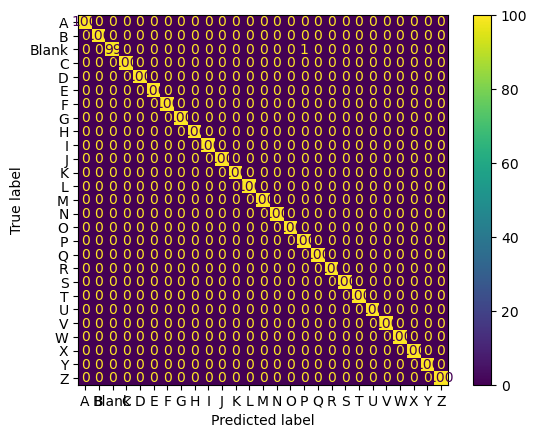

In [ ]:
confusion_matrix = confusion_matrix(true_labels3, predicted_labels4)
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=class_names)

disp.plot()
plt.show()

It's difficult to discern, but there seems to be an error related to the letter P

d:\REPO\LocalFInal\Data\Test_Alphabet\P\0b7de647-c948-438c-b4bf-8973c5296d41.rgb_0000.png


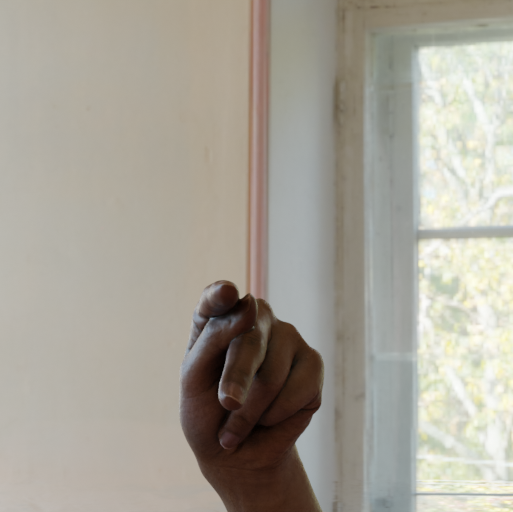

d:\REPO\LocalFInal\Data\Test_Alphabet\Q\07dc2210-f700-4f84-8f73-17d14a1332ca.rgb_0000.png


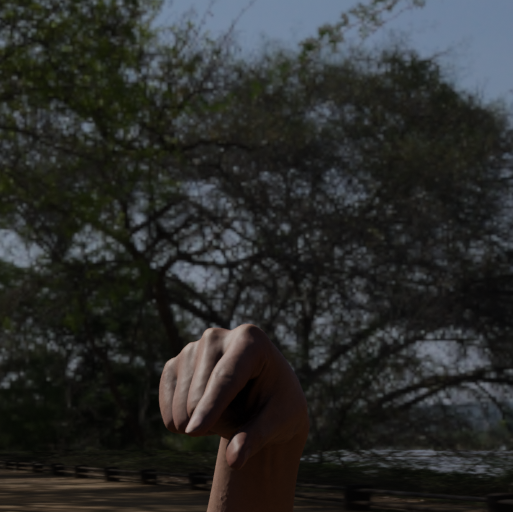

In [91]:
train_a_dir_p = 'Data\\Test_Alphabet\\P'
pathP = cwd + '\\' + train_a_dir_p + '\\' + filepaths[train_a_dir_p]['files'][6]
print(pathP)
imgP = Image.open(pathP)
display.display(imgP)
imgP.show()


train_a_dir_q = 'Data\\Test_Alphabet\\Q'
pathq = cwd + '\\' + train_a_dir_q + '\\' + filepaths[train_a_dir_q]['files'][5]
print(pathq)
imgq = Image.open(pathq)
display.display(imgq)
imgq.show()

### Evaluating Model Performance: Progress and Future Directions

The exploration of Convolutional Neural Networks (CNNs) for recognizing hand signs in the American Sign Language (ASL) alphabet has been a fascinating journey of innovation and learning. This essay reflects on the performance of two models, highlights key insights, and charts the path for future improvements based on their evaluation metrics.

#### Performance Overview

The initial assumption was that recognizing hand signs, especially with complex variations, would be a challenging task for a Neural Network. This belief stemmed from the general difficulty AI faces in processing intricate details, such as accurately portraying hands in generated images. However, the results from both models exceeded expectations, showcasing the remarkable capability of CNNs to extract and learn meaningful features from visual data.

### Performance Comparison

| **Metric**              | **Model 1**            | **Model 2**            | **Improvement**                  |
|--------------------------|------------------------|------------------------|-----------------------------------|
| **Training Accuracy**    | 0.6166 (61.66%)       | 0.9676 (96.76%)       | Significant improvement (+35.10%)|
| **Training Loss**        | 1.3258               | 0.1172               | Drastic reduction (-1.2086)       |
| **Validation Accuracy**  | 0.6526 (65.26%)       | 0.9993 (99.93%)       | Remarkable improvement (+34.67%) |
| **Validation Loss**      | 1.6062               | 0.0108               | Substantial reduction (-1.5954)   |
| **Execution Time**       | 78s                  | 79s                  | Slight increase (+1s)             |



### Analysis:

1. **Accuracy Improvements**:
   Model 2 exhibits a dramatic increase in both training and validation accuracy compared to Model 1. While Model 1 struggled with a training accuracy of 61.66% and validation accuracy of 65.26%, Model 2 almost achieved perfect performance (96.76% training accuracy and 99.93% validation accuracy). This suggests that the refinements made to the architecture and training strategy were highly effective.

2. **Loss Reduction**:
   The training and validation losses experienced a significant reduction between the two models. Model 1 showed high loss values (1.3258 for training and 1.6062 for validation), indicating difficulty in fitting the data and generalizing to the validation set. Model 2, on the other hand, demonstrated excellent convergence with minimal loss (0.1172 for training and 0.0108 for validation).

3. **Generalization Ability**:
   Model 2's near-perfect validation accuracy and minimal validation loss reflect its strong ability to generalize to unseen data, addressing one of the key challenges of overfitting present in Model 1.

4. **Execution Time**:
   The training time increased slightly for Model 2 (79s compared to 78s for Model 1). However, this marginal difference is negligible considering the substantial performance improvements achieved.


### Key Takeaways:
- Model 2 represents a well-optimized solution with improved accuracy and reduced loss across both training and validation data. These results validate the effectiveness of the adjustments made in its architecture and training strategy.
- Model 1, while functional, struggled with lower accuracy and higher loss values, indicating the need for significant refinement to compete with Model 2's performance.

Overall, Model 2 vastly outperformed Model 1, showcasing the impact of iterative improvements in machine learning workflows. Let me know if you'd like further analysis or recommendations for the next steps!


#### Future Directions

To address these challenges and further improve model performance, several strategies can be implemented:
1. **Data Augmentation:** Introducing additional variations of P and Q signs, such as slight rotations or shifts, can help the model learn to distinguish these letters more effectively.

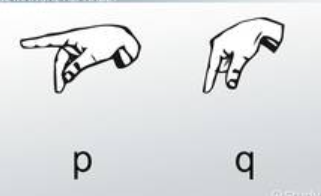

2. **Feature Engineering:** Modifying the CNN architecture to include more specialized layers or attention mechanisms could enhance the model's ability to focus on critical differences between similar signs.
3. **Error Analysis:** Conducting a deeper analysis of the confusion matrix will provide valuable insights into the specific features causing misclassifications, enabling more targeted interventions.

#### Broader Implications

The success of this project underscores the potential of machine learning in advancing accessibility technologies. Recognizing ASL alphabet signs with high accuracy is not merely a technical achievement—it is a step toward fostering inclusivity and breaking down communication barriers for the Deaf and Hard-of-Hearing communities.

As we continue to refine and enhance the model, this work serves as a testament to the transformative power of AI in addressing real-world challenges. Each iteration brings us closer to realizing the vision of a truly inclusive society where technology serves as a bridge, connecting diverse communities through innovation and understanding.


# GitHub repository

https://github.com/amarquezsv/CSCA-5642
